In [9]:
import pandas as pd
import numpy as np
import scipy.io

from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.colors as colors

import weightedcalcs as wc


In [10]:
cntry = "JPN"
filedate = "0306"

In [11]:
def create_grid(df,x,y,z):
    # 2D-arrays from DataFrame
    x1 = np.linspace(df[x].min(), df[x].max(), len(df[x].unique()))

    y1 = np.linspace(df[y].min(), df[y].max(), len(df[y].unique()))


    x2, y2 = np.meshgrid(x1, y1)

# Interpolate unstructured D-dimensional data.
    z2 = griddata((df[x], df[y]), df[z], (x2, y2), method='linear')
    
    return x2, y2, z2

In [12]:
hh = pd.read_csv("./output/household_data_pre_fg.csv")

In [13]:
hh

,income,weights,homeshare,home_choice,consumption
0,0.397249,0.008970,0.998873,0.998873,0.303248
1,0.394875,0.007035,0.997023,0.997094,0.396912
2,0.392502,0.004168,0.994807,0.995407,0.443128
3,0.390128,0.001766,0.993585,0.994408,0.482739
4,0.387754,0.001239,0.991948,0.993146,0.512995
...,...,...,...,...,...
995,3.208928,0.000340,0.811538,0.831056,3.237950
996,3.206554,0.000731,0.810528,0.826943,3.331415
997,3.204180,0.000177,0.808950,0.822407,3.424708
998,3.201807,0.000203,0.806884,0.817512,3.517783


In [14]:
calc = wc.Calculator("weights")

## Fix prices, let the trade cost adjust...

In [15]:
foo = "./output/household-data-US-" + cntry + "-fix-p-fg" + filedate + ".csv"

hhpost = pd.read_csv(foo)

foo = "./output/welfare-US-" + cntry + "-fix-p-fg" + filedate + ".csv"

welfare = pd.read_csv(foo)

hhpost = pd.merge(hhpost, welfare[["welfare", "asset", "shock"]], left_index = True, right_index = True)


In [16]:
income_type = "asset"

foo = hhpost[((hhpost[income_type] <= calc.quantile(hhpost, income_type, 0.25)) )];

######## Guys at bottom
print("Bottom Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Bottom Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Median
print(" ")
print("Median Trade Share")
print(round(1 - calc.median(hhpost,"homeshare"), 4))
print(" ")
print("Median Welfare")
print(round(calc.median(hhpost,"welfare"),4))

foo = hhpost[((hhpost[income_type] >= calc.quantile(hhpost, income_type, 0.75)) )];

######## Top
print(" ")
print("Top Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Top Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Aggregate 
print(" ")
print("Aggregate Welfare")
print(round(calc.mean(hhpost,"welfare"),4))

foo = hhpost[(hhpost.welfare <= -0.001 )];

print(" ")
print("Share who Loose")
print(round(foo.weights.sum(),4))
print(round(calc.mean(foo,"asset"),4))

Bottom Quartile Trade Share
0.0032
 
Bottom Welfare
0.0279
 
Median Trade Share
0.0235
 
Median Welfare
0.0878
 
Top Quartile Trade Share
0.1236
 
Top Welfare
0.2909
 
Aggregate Welfare
0.1362
 
Share who Loose
0.0
nan


C:\Users\mwaugh\AppData\Local\Continuum\anaconda3\lib\site-packages\weightedcalcs\core.py:64: RuntimeWarning: invalid value encountered in double_scalars
  return (values * weights).sum() / total_weight


---

### Let prices adjust

So now R, w will change. 

Side note: Recall that w and R have to move to (i) make sure supply of goods equalls world demand and this is modulated by the price at which goods are supplied at and (ii) that asset demand within a country equalls asset supply (and this would be modulated by R). These things do have to work in concert...but this is the demarcation.

In [17]:
foo = "./output/household-data-US-" + cntry + "-ge-fg" + filedate + ".csv"

hhpost = pd.read_csv(foo)

foo = "./output/welfare-US-" + cntry + "-ge-fg" + filedate + ".csv"

welfare = pd.read_csv(foo)

hhpost = pd.merge(hhpost, welfare[["welfare", "asset", "shock"]], left_index = True, right_index = True)


In [18]:
income_type = "asset"

foo = hhpost[((hhpost[income_type] <= calc.quantile(hhpost, income_type, 0.25)) )];

######## Guys at bottom
print("Bottom Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Bottom Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Median
print(" ")
print("Median Trade Share")
print(round(1 - calc.median(hhpost,"homeshare"), 4))
print(" ")
print("Median Welfare")
print(round(calc.median(hhpost,"welfare"),4))

foo = hhpost[((hhpost[income_type] >= calc.quantile(hhpost, income_type, 0.75)) )];

######## Top
print(" ")
print("Top Quartile Trade Share")
print(round(1-calc.median(foo,"homeshare"),4))
print(" ")
print("Top Welfare")
print(round(calc.median(foo,"welfare"),4))


######## Aggregate 
print(" ")
print("Aggregate Welfare")
print(round(calc.mean(hhpost,"welfare"),4))

foo = hhpost[(hhpost.welfare <= 0.0 )];

print(" ")
print("Share who Loose")
print(round(foo.weights.sum(),4))
print(round(calc.mean(foo,"asset"),4))

Bottom Quartile Trade Share
0.0027
 
Bottom Welfare
0.0781
 
Median Trade Share
0.021
 
Median Welfare
0.1199
 
Top Quartile Trade Share
0.1172
 
Top Welfare
0.2955
 
Aggregate Welfare
0.1612
 
Share who Loose
0.0
nan


In [26]:
foo = "./output/welfare-US-" + cntry + "-fix-p-fg" + filedate + ".csv"

welfare_fixp = pd.read_csv(foo)

welfare_fixp = welfare_fixp[welfare_fixp.asset < 7]
# edge towards upper boundry sometimes gets weird

min_welfare = welfare_fixp.welfare.min()
max_welfare = welfare_fixp.welfare.max()

C:\Users\mwaugh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


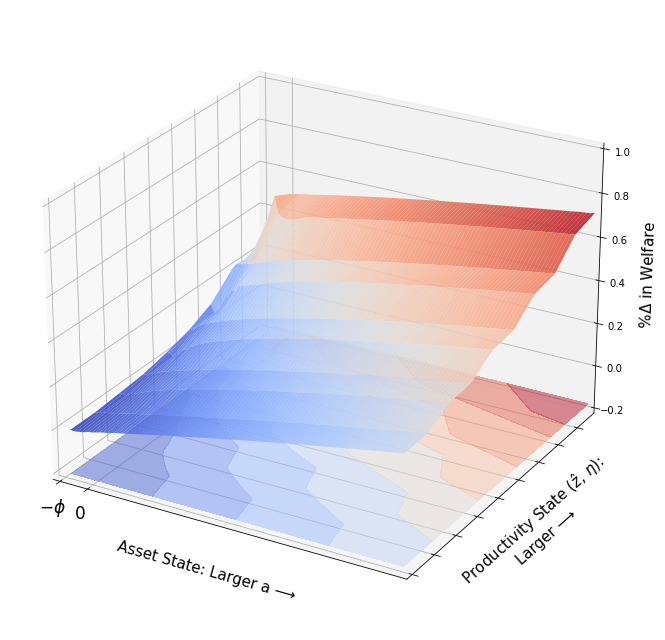

In [30]:
x, y, z = create_grid(welfare_fixp,"asset","shock","welfare")

fig = plt.figure(figsize = [15.0,9], tight_layout = True)

#ax = fig.gca(projection='3d')

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', 
                       norm=colors.Normalize(vmin= min_welfare, vmax=max_welfare),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -.20

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', 
                norm=colors.Normalize(vmin= min_welfare, vmax=max_welfare), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)

ax.set_xlim(-.5,7.0)
ax.set_xticks([-0.65, 0.0])
ax.set_xticklabels(["$-\phi$","0"], fontsize = 17)


ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.set_zlim(-.20, 1.0)

ax.set_ylabel("\n Productivity State ($\hat z$, $\eta$):\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n %$\Delta$ in Welfare", fontsize = 15)

plt.savefig("../notes/figures/welfare-jpn-fix-p.pdf", bbox_inches = "tight")

plt.show()

In [28]:
foo = "./output/welfare-US-" + cntry + "-ge-fg" + filedate + ".csv"

welfare_ge = pd.read_csv(foo)

welfare_ge = welfare_ge[welfare_ge.asset < 7]
# edge towards upper boundry sometimes gets weird

C:\Users\mwaugh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


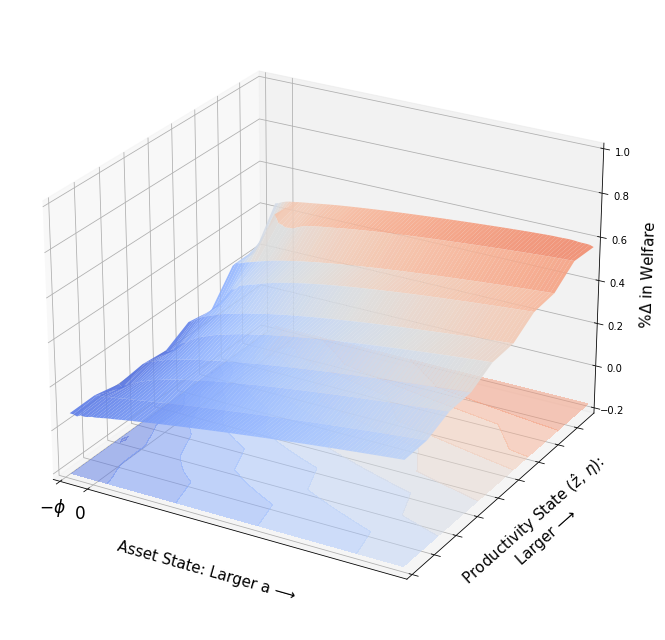

In [29]:
x, y, z = create_grid(welfare_ge,"asset","shock","welfare")

fig = plt.figure(figsize = [15.0,9], tight_layout = True)

#ax = fig.gca(projection='3d')

ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='coolwarm', 
                       norm=colors.Normalize(vmin= min_welfare, vmax=max_welfare),
                    linewidth=0, antialiased=True, alpha = 0.90, linestyles = "dashed")

ofs = -.20

ax.contourf(x, y, z, 10, offset=ofs, cmap='coolwarm', 
                norm=colors.Normalize(vmin= min_welfare, vmax=max_welfare), 
                 alpha = 0.50, linestyles = "dashed")

ax.view_init(25,300)

ax.set_xlim(-.5,7.0)
ax.set_xticks([-0.65, 0.0])
ax.set_xticklabels(["$-\phi$","0"], fontsize = 17)


ax.set_ylim(0.95,9.7)
ax.set_yticklabels([])

ax.set_zlim(-.20, 1.0)

ax.set_ylabel("\n Productivity State ($\hat z$, $\eta$):\n Larger ⟶ ", fontsize = 15)
ax.set_xlabel("\n Asset State: Larger a ⟶ " , fontsize = 15)
ax.set_zlabel("\n %$\Delta$ in Welfare", fontsize = 15)

plt.savefig("../notes/figures/welfare-jpn-ge.pdf")

plt.show()